# Task #1 Prediction Using Supervised ML
## Name : ASIF ARMAN HAQUE
### What will be predicted score if a student studies for 9.25 hrs/ day?

#### Importing all required libraries

In [25]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
%matplotlib inline

#### Reading in the data

In [26]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Checking for any missing values

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

###### Thus, we can conclude that our data contains no missing values.

#### Visualizing the data

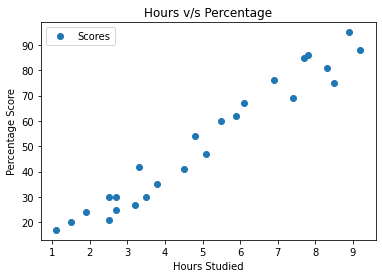

In [29]:
data.plot(x = 'Hours', y = 'Scores', style = 'o')  
plt.title('Hours v/s Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing the data

In [30]:
# Splitting the data into x-axis values and y-axis values
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=42) 

### Training the Algorithm

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

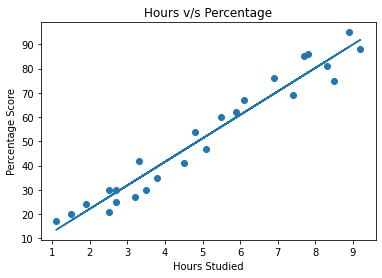

In [32]:
# Plotting the regression line
line = lr.coef_*x + lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.title('Hours v/s Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Making Predictions on our test set

In [33]:
y_pred = lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [34]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
test = [[hours]]
pred_val = lr.predict(test)
print("Predicted Score of student studying for {} hours is {}".format(hours,pred_val[0]))

Predicted Score of student studying for 9.25 hours is 92.38611528261494


### Looking at the  error metrics for our predictive model

In [36]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
